In [1]:
# Import necessary libraries
import numpy as np # Numerical computing and array operations
import librosa # Audio and music processin
import librosa.display # Data visualization
import matplotlib.pyplot as plt
import IPython.display as ipd # Interactive display of audio in Jupyter notebooks
from scipy.io import wavfile # Audio file I/O operations
import pandas as pd # Data manipulation and analysis

In [2]:
# Load an audio file
audio_path = "D:/Acoustics/Gender/Gender 1.0/data/archive (6)/data/female/arctic_a0001.wav" # Or replace with your audio file
y, sr = librosa.load(audio_path)

In [3]:
# Display basic information about the audio file
duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {duration:.2f} seconds")
print(f"Sample rate: {sr} Hz")
print(f"Number of samples: {len(y)}")
print(f"Shape of audio array: {y.shape}")

Audio duration: 3.69 seconds
Sample rate: 22050 Hz
Number of samples: 81255
Shape of audio array: (81255,)


In [4]:
# Play the audio file
ipd.display(ipd.Audio(y, rate=sr))

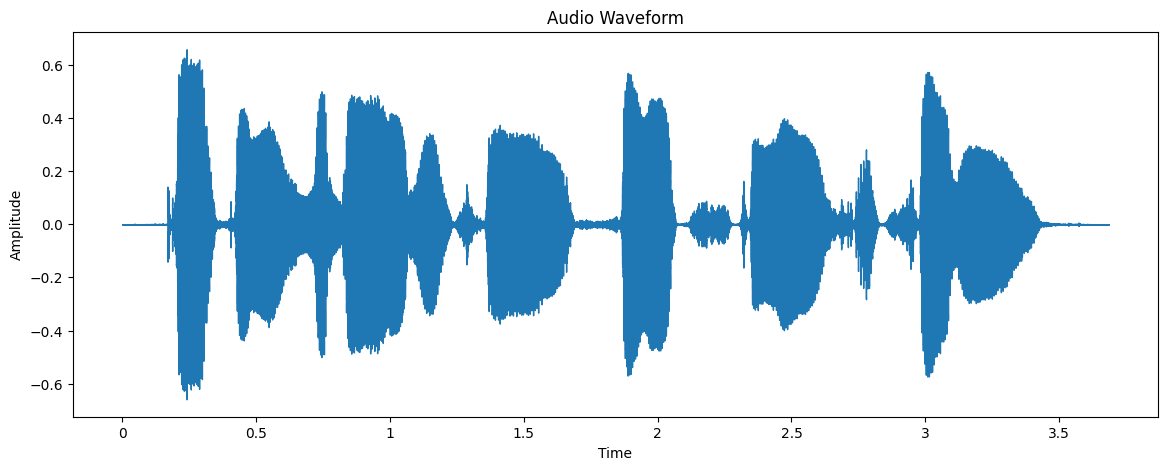

In [5]:
# Visualize the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

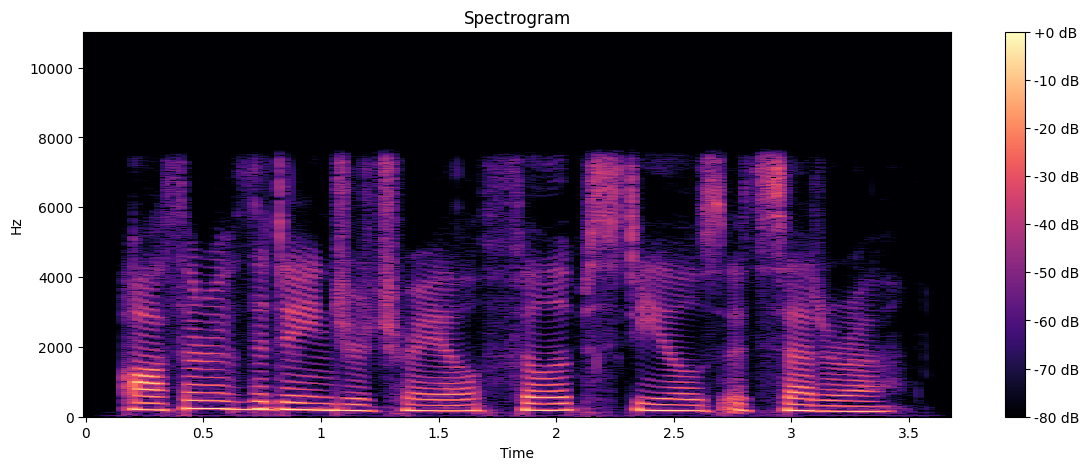

In [7]:
# Compute the spectrogram
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to dB scale

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

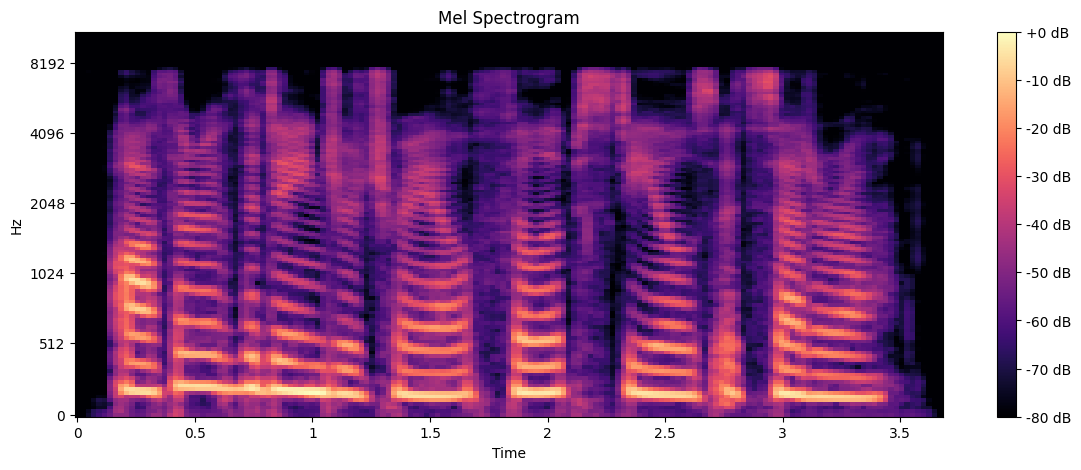

In [8]:
# Compute the mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db_mel = librosa.power_to_db(S, ref=np.max)

# Display the mel spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db_mel, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

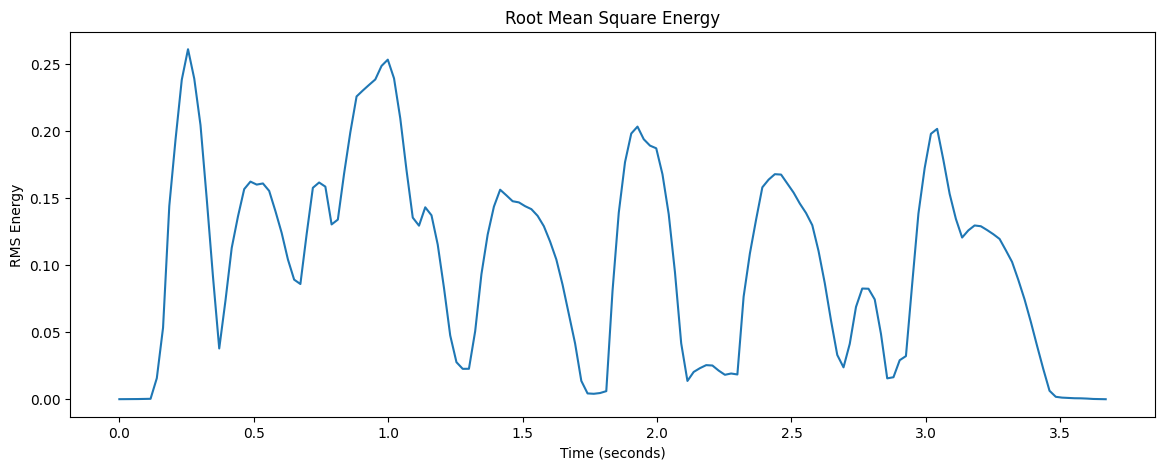

In [9]:
# Calculate RMS energy
frame_length = 2048
hop_length = 512
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Plot RMS energy
plt.figure(figsize=(14, 5))
times = librosa.times_like(rms, sr=sr, hop_length=hop_length)
plt.plot(times, rms[0])
plt.title("Root Mean Square Energy")
plt.xlabel("Time (seconds)")
plt.ylabel("RMS Energy")
plt.show()

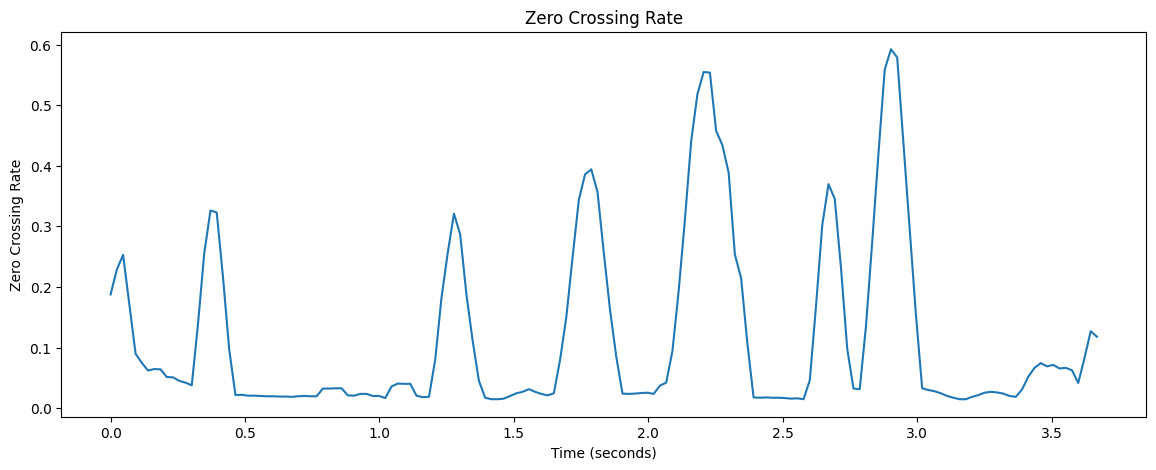

In [10]:
# Calculate Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length)

# Plot Zero Crossing Rate
plt.figure(figsize=(14, 5))
times = librosa.times_like(zcr, sr=sr, hop_length=hop_length)
plt.plot(times, zcr[0])
plt.title("Zero Crossing Rate")
plt.xlabel("Time (seconds)")
plt.ylabel("Zero Crossing Rate")
plt.show()

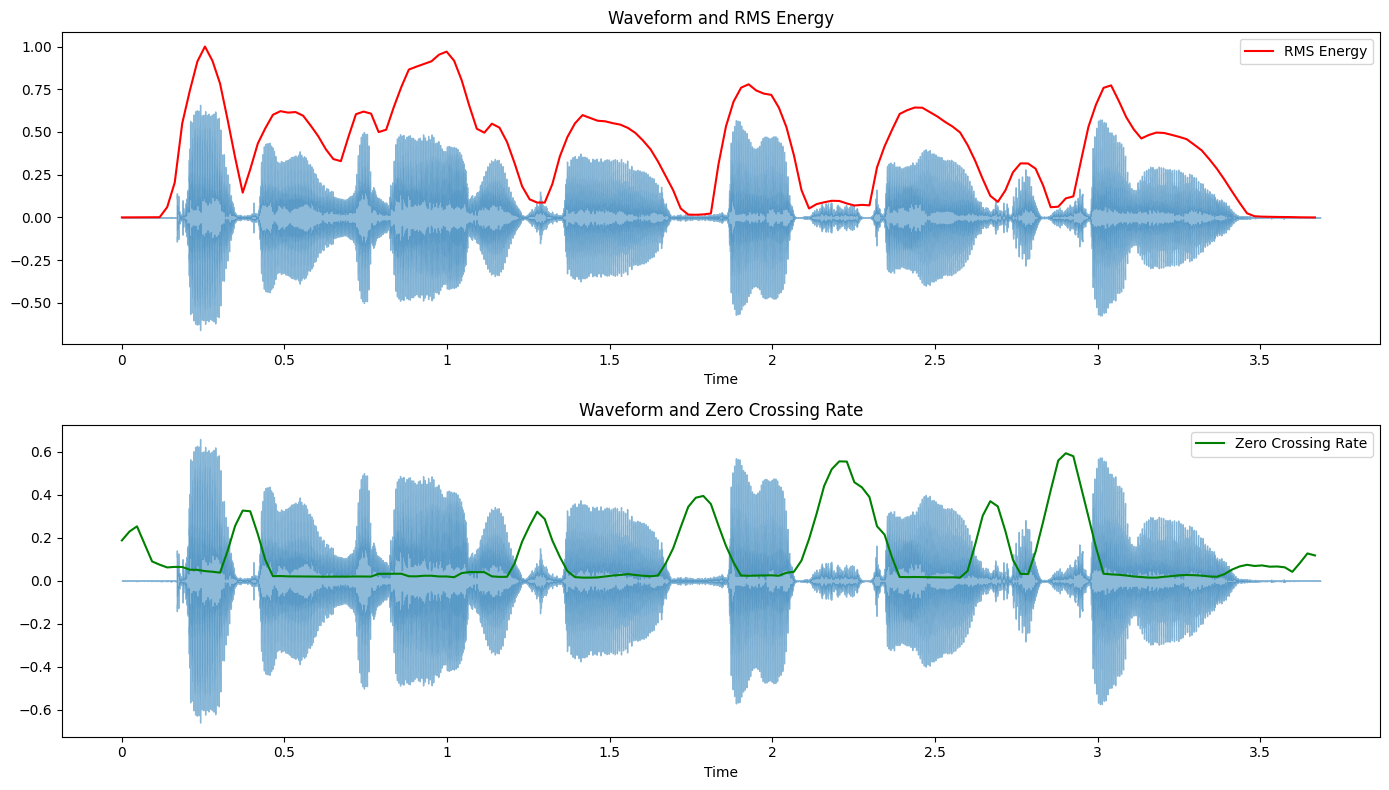

In [11]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(times, rms[0] / rms.max(), color='r', label='RMS Energy')
plt.title("Waveform and RMS Energy")
plt.legend()

plt.subplot(2, 1, 2)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(times, zcr[0], color='g', label='Zero Crossing Rate')
plt.title("Waveform and Zero Crossing Rate")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Calculate statistics
rms_mean = np.mean(rms)
rms_std = np.std(rms)
zcr_mean = np.mean(zcr)
zcr_std = np.std(zcr)

print(f"RMS Energy - Mean: {rms_mean:.4f}, Std Dev: {rms_std:.4f}")
print(f"Zero Crossing Rate - Mean: {zcr_mean:.4f}, Std Dev: {zcr_std:.4f}")

RMS Energy - Mean: 0.1043, Std Dev: 0.0708
Zero Crossing Rate - Mean: 0.1194, Std Dev: 0.1463


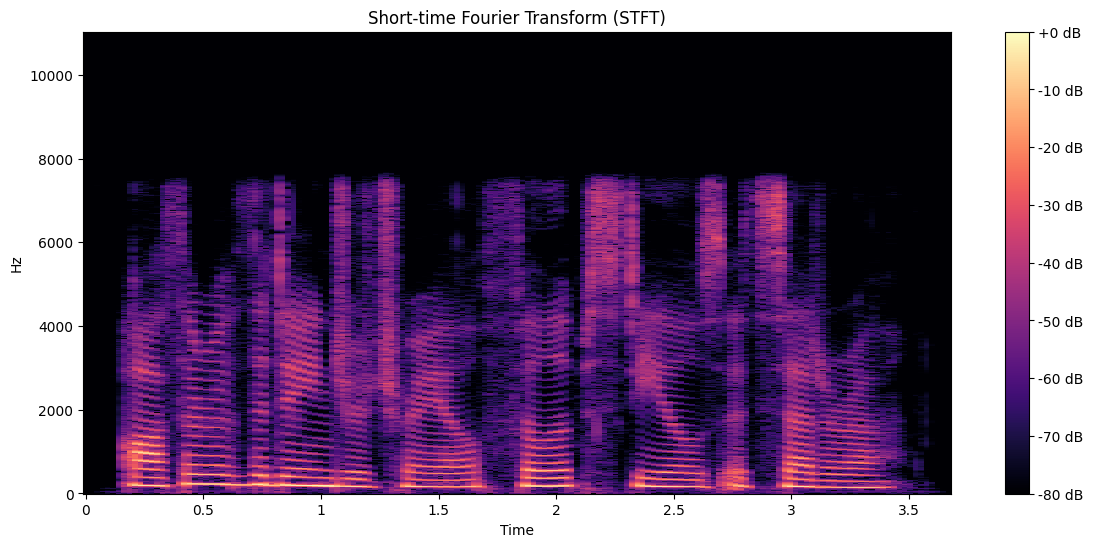

In [13]:
# Compute STFT
n_fft = 2048
hop_length = 512
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Convert to dB scale
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Visualize the spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Short-time Fourier Transform (STFT)')
plt.show()

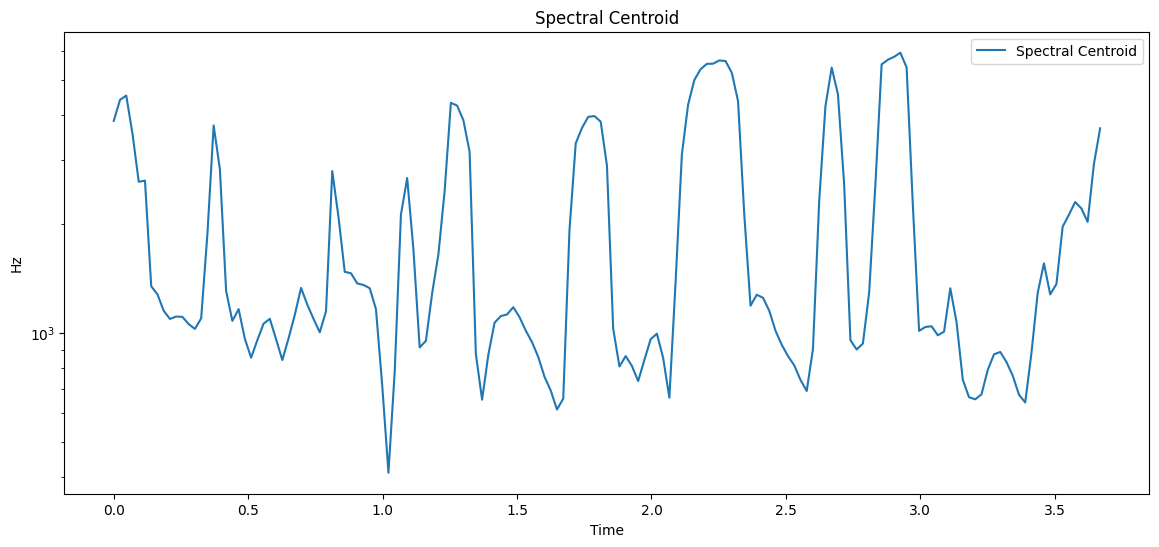

In [14]:
# Compute spectral centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)

# Visualize spectral centroid
plt.figure(figsize=(14, 6))
times = librosa.times_like(centroid, sr=sr, hop_length=hop_length)
plt.semilogy(times, centroid[0], label='Spectral Centroid')
plt.ylabel('Hz')
plt.xlabel('Time')
plt.legend()
plt.title('Spectral Centroid')
plt.show()

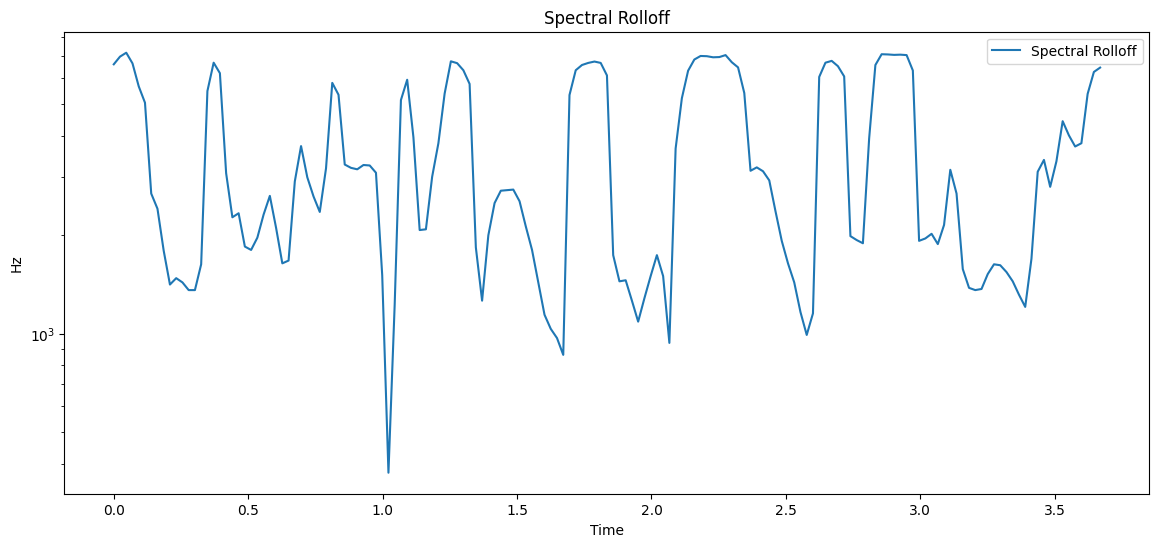

In [15]:
# Compute spectral rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)

# Visualize spectral rolloff
plt.figure(figsize=(14, 6))
times = librosa.times_like(rolloff, sr=sr, hop_length=hop_length)
plt.semilogy(times, rolloff[0], label='Spectral Rolloff')
plt.ylabel('Hz')
plt.xlabel('Time')
plt.legend()
plt.title('Spectral Rolloff')
plt.show()

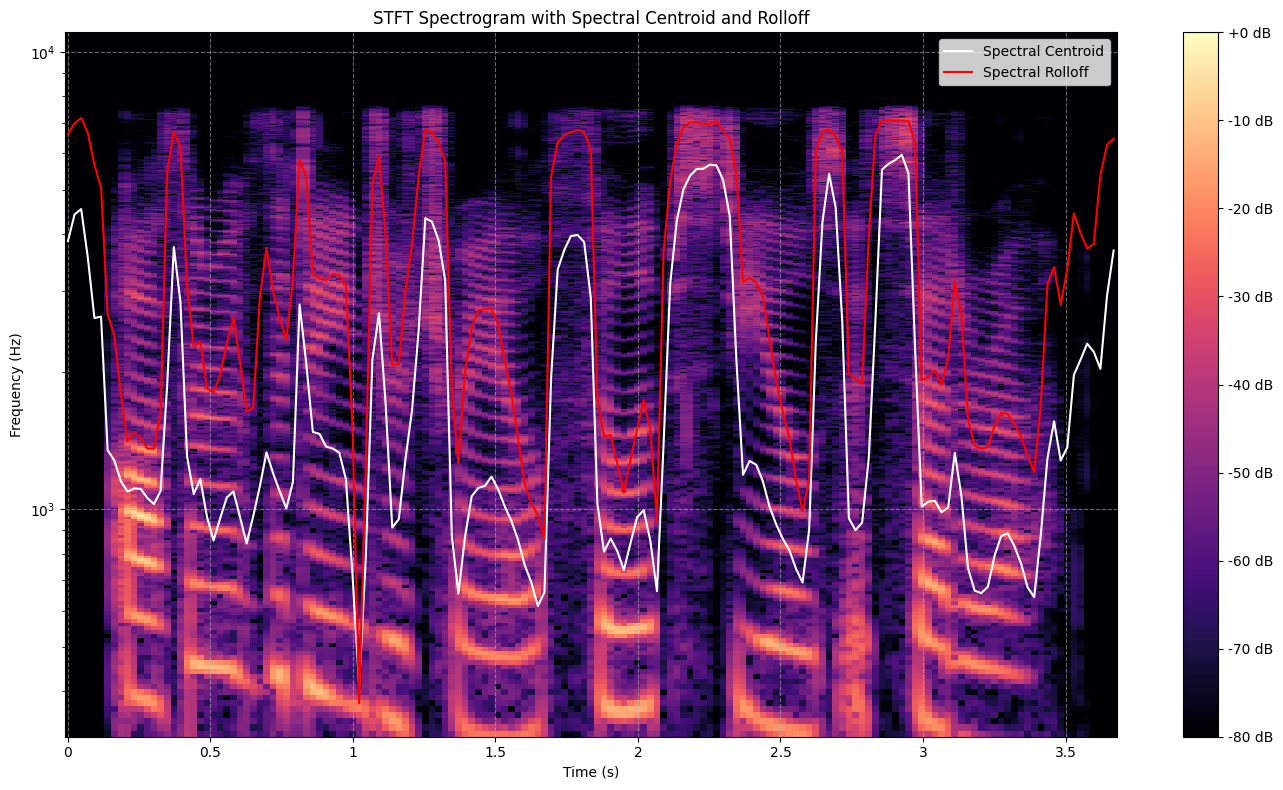

In [16]:
plt.figure(figsize=(14, 8))

# Plot spectrogram
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram with Spectral Centroid and Rolloff')

# Plot spectral centroid on top of the spectrogram
plt.semilogy(times, centroid[0], label='Spectral Centroid', color='w')

# Plot spectral rolloff on top of the spectrogram
plt.semilogy(times, rolloff[0], label='Spectral Rolloff', color='r')

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
# Calculate statistics
centroid_mean = np.mean(centroid)
centroid_std = np.std(centroid)
rolloff_mean = np.mean(rolloff)
rolloff_std = np.std(rolloff)

print(f"Spectral Centroid - Mean: {centroid_mean:.2f} Hz, Std Dev: {centroid_std:.2f} Hz")
print(f"Spectral Rolloff - Mean: {rolloff_mean:.2f} Hz, Std Dev: {rolloff_std:.2f} Hz")

Spectral Centroid - Mean: 1939.61 Hz, Std Dev: 1490.54 Hz
Spectral Rolloff - Mean: 3513.16 Hz, Std Dev: 2113.54 Hz


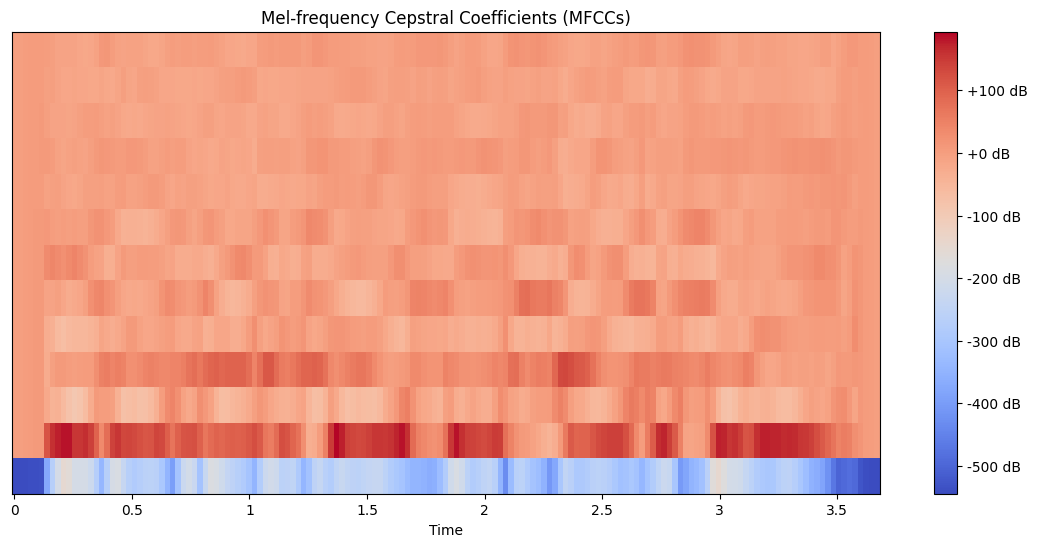

In [18]:
# Compute MFCCs
n_mfcc = 13
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Visualize MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency Cepstral Coefficients (MFCCs)')
plt.show()

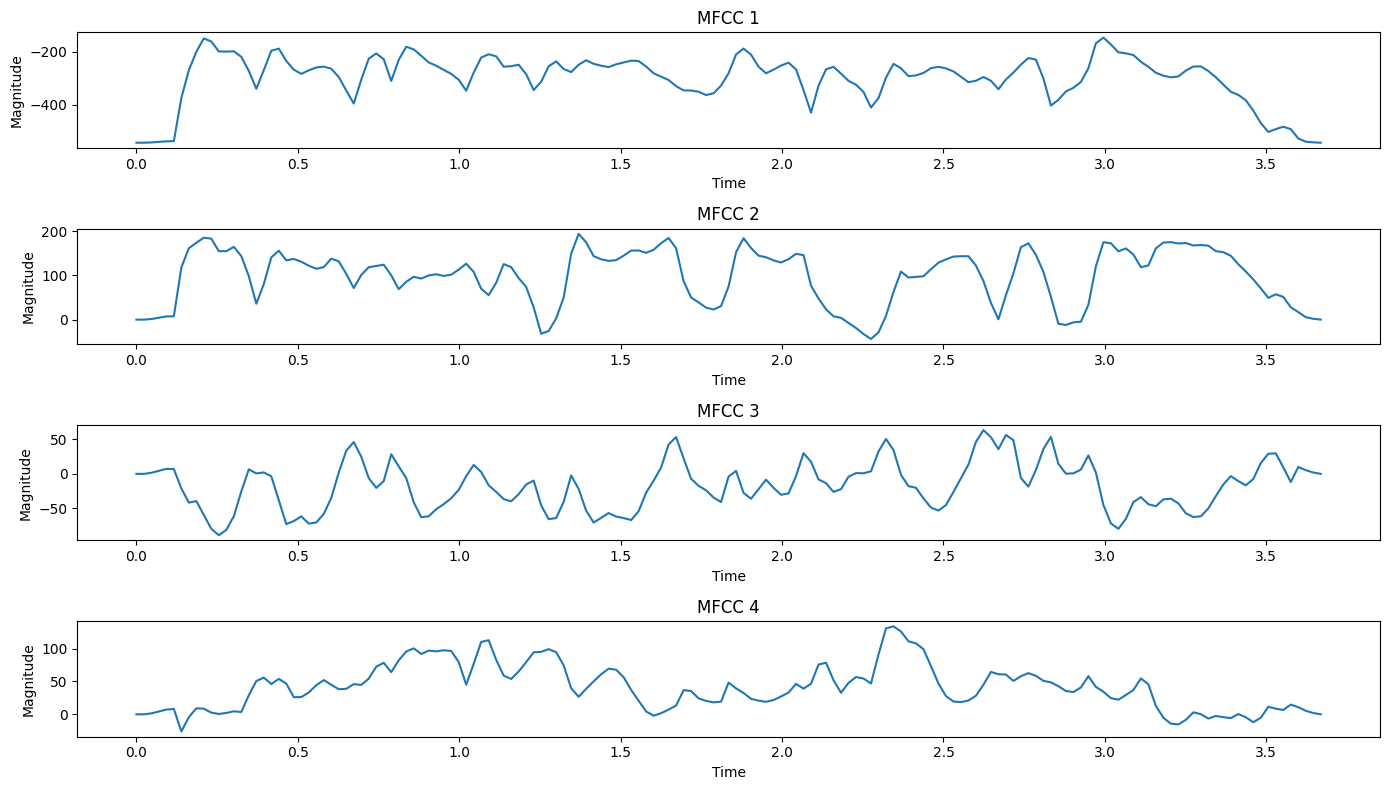

In [19]:
plt.figure(figsize=(14, 8))
for i in range(4):  # Plot first 4 MFCCs
    plt.subplot(4, 1, i+1)
    plt.plot(librosa.times_like(mfccs), mfccs[i])
    plt.title(f'MFCC {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

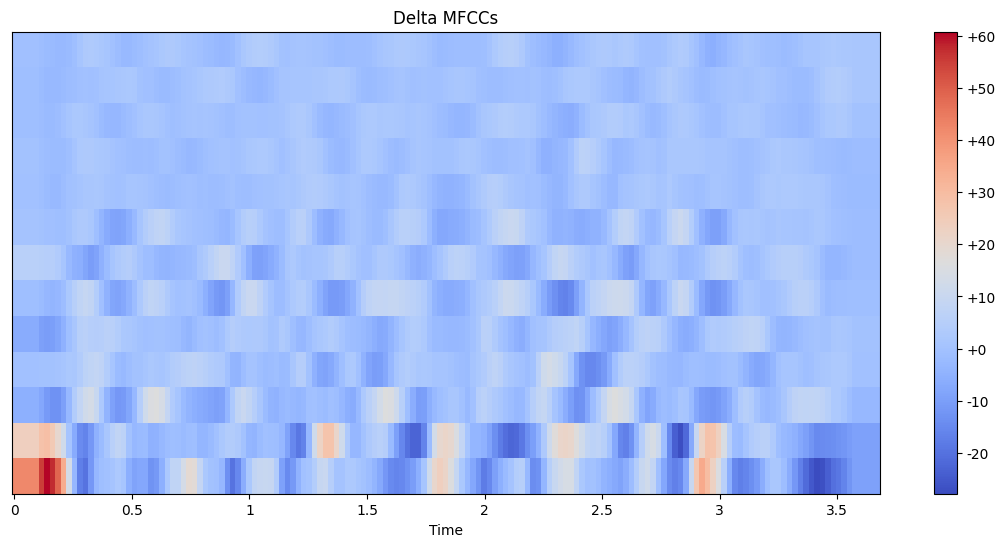

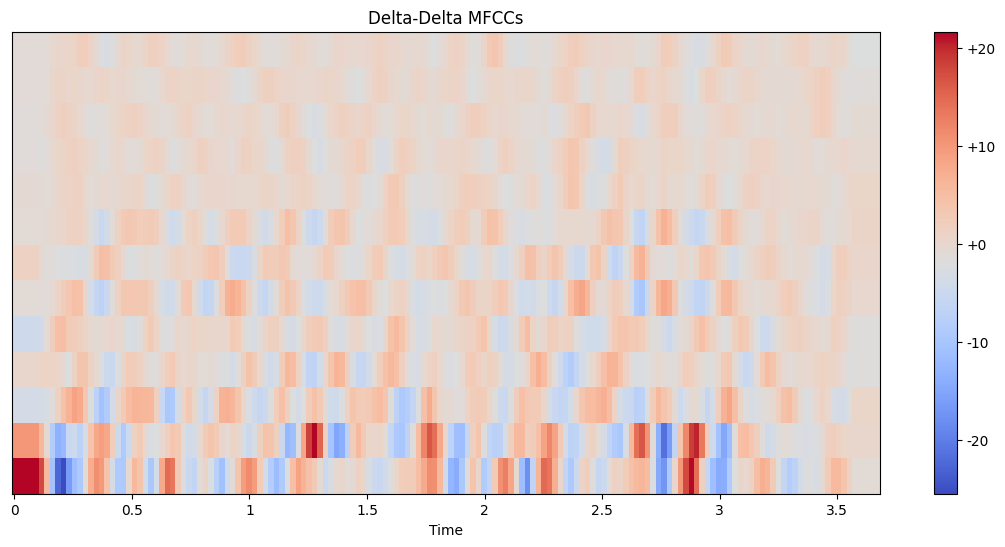

In [20]:
# Compute delta and delta-delta MFCCs
mfccs_delta = librosa.feature.delta(mfccs)
mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

# Visualize delta MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs_delta, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Delta MFCCs')
plt.show()

# Visualize delta-delta MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs_delta2, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Delta-Delta MFCCs')
plt.show()

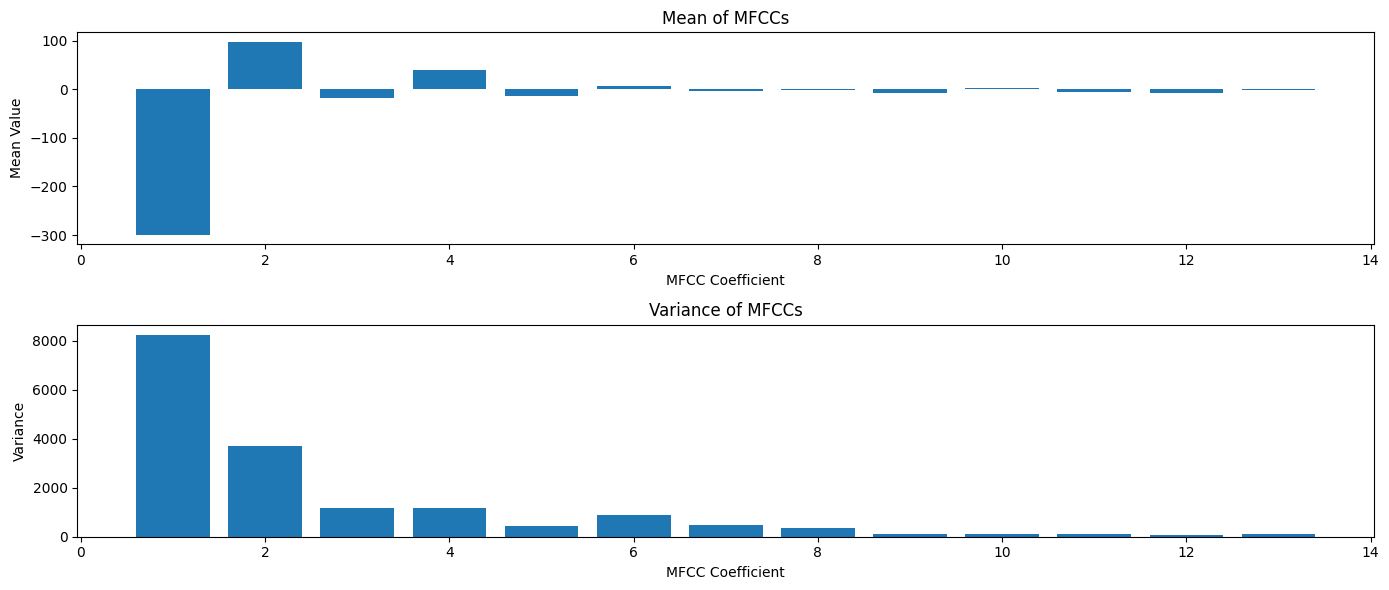

In [21]:
# Calculate statistics
mfcc_means = np.mean(mfccs, axis=1)
mfcc_vars = np.var(mfccs, axis=1)
delta_means = np.mean(mfccs_delta, axis=1)
delta_vars = np.var(mfccs_delta, axis=1)

# Display statistics
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.bar(range(1, n_mfcc + 1), mfcc_means)
plt.title('Mean of MFCCs')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Mean Value')

plt.subplot(2, 1, 2)
plt.bar(range(1, n_mfcc + 1), mfcc_vars)
plt.title('Variance of MFCCs')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

In [22]:
def extract_features(y, sr):
    """
    Extract various audio features from an audio signal.
    
    Parameters:
    y (np.ndarray): Audio time series
    sr (int): Sampling rate
    
    Returns:
    dict: Dictionary of extracted features
    """
    features = {}
    
    # Time-domain features
    features['rms'] = librosa.feature.rms(y=y).mean()
    features['zcr'] = librosa.feature.zero_crossing_rate(y).mean()
    
    # Frequency-domain features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['spectral_centroid'] = spectral_centroid.mean()
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['spectral_rolloff'] = spectral_rolloff.mean()
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i, mfcc in enumerate(mfccs):
        features[f'mfcc_{i+1}'] = mfcc.mean()
    return features

# Extract features from the audio file
audio_features = extract_features(y, sr)
df = pd.DataFrame([audio_features]) # Convert to DataFrame.

df.T

,0
rms,0.104287
zcr,0.119442
spectral_centroid,1939.611995
spectral_rolloff,3513.162404
mfcc_1,-299.141693
mfcc_2,97.856018
mfcc_3,-17.372971
mfcc_4,41.049072
mfcc_5,-13.292717
mfcc_6,7.013628
